In [418]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

In [419]:
ewa_df=pd.read_csv("EastWestAirlines.csv")
ewa_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Data Preprocessing

In [420]:
ewa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [421]:
ewa_df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [422]:
ewa_df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [423]:
ewa_df.duplicated().sum()

0

In [424]:
ewa_df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [425]:
ewa_df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [426]:
ewa_df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


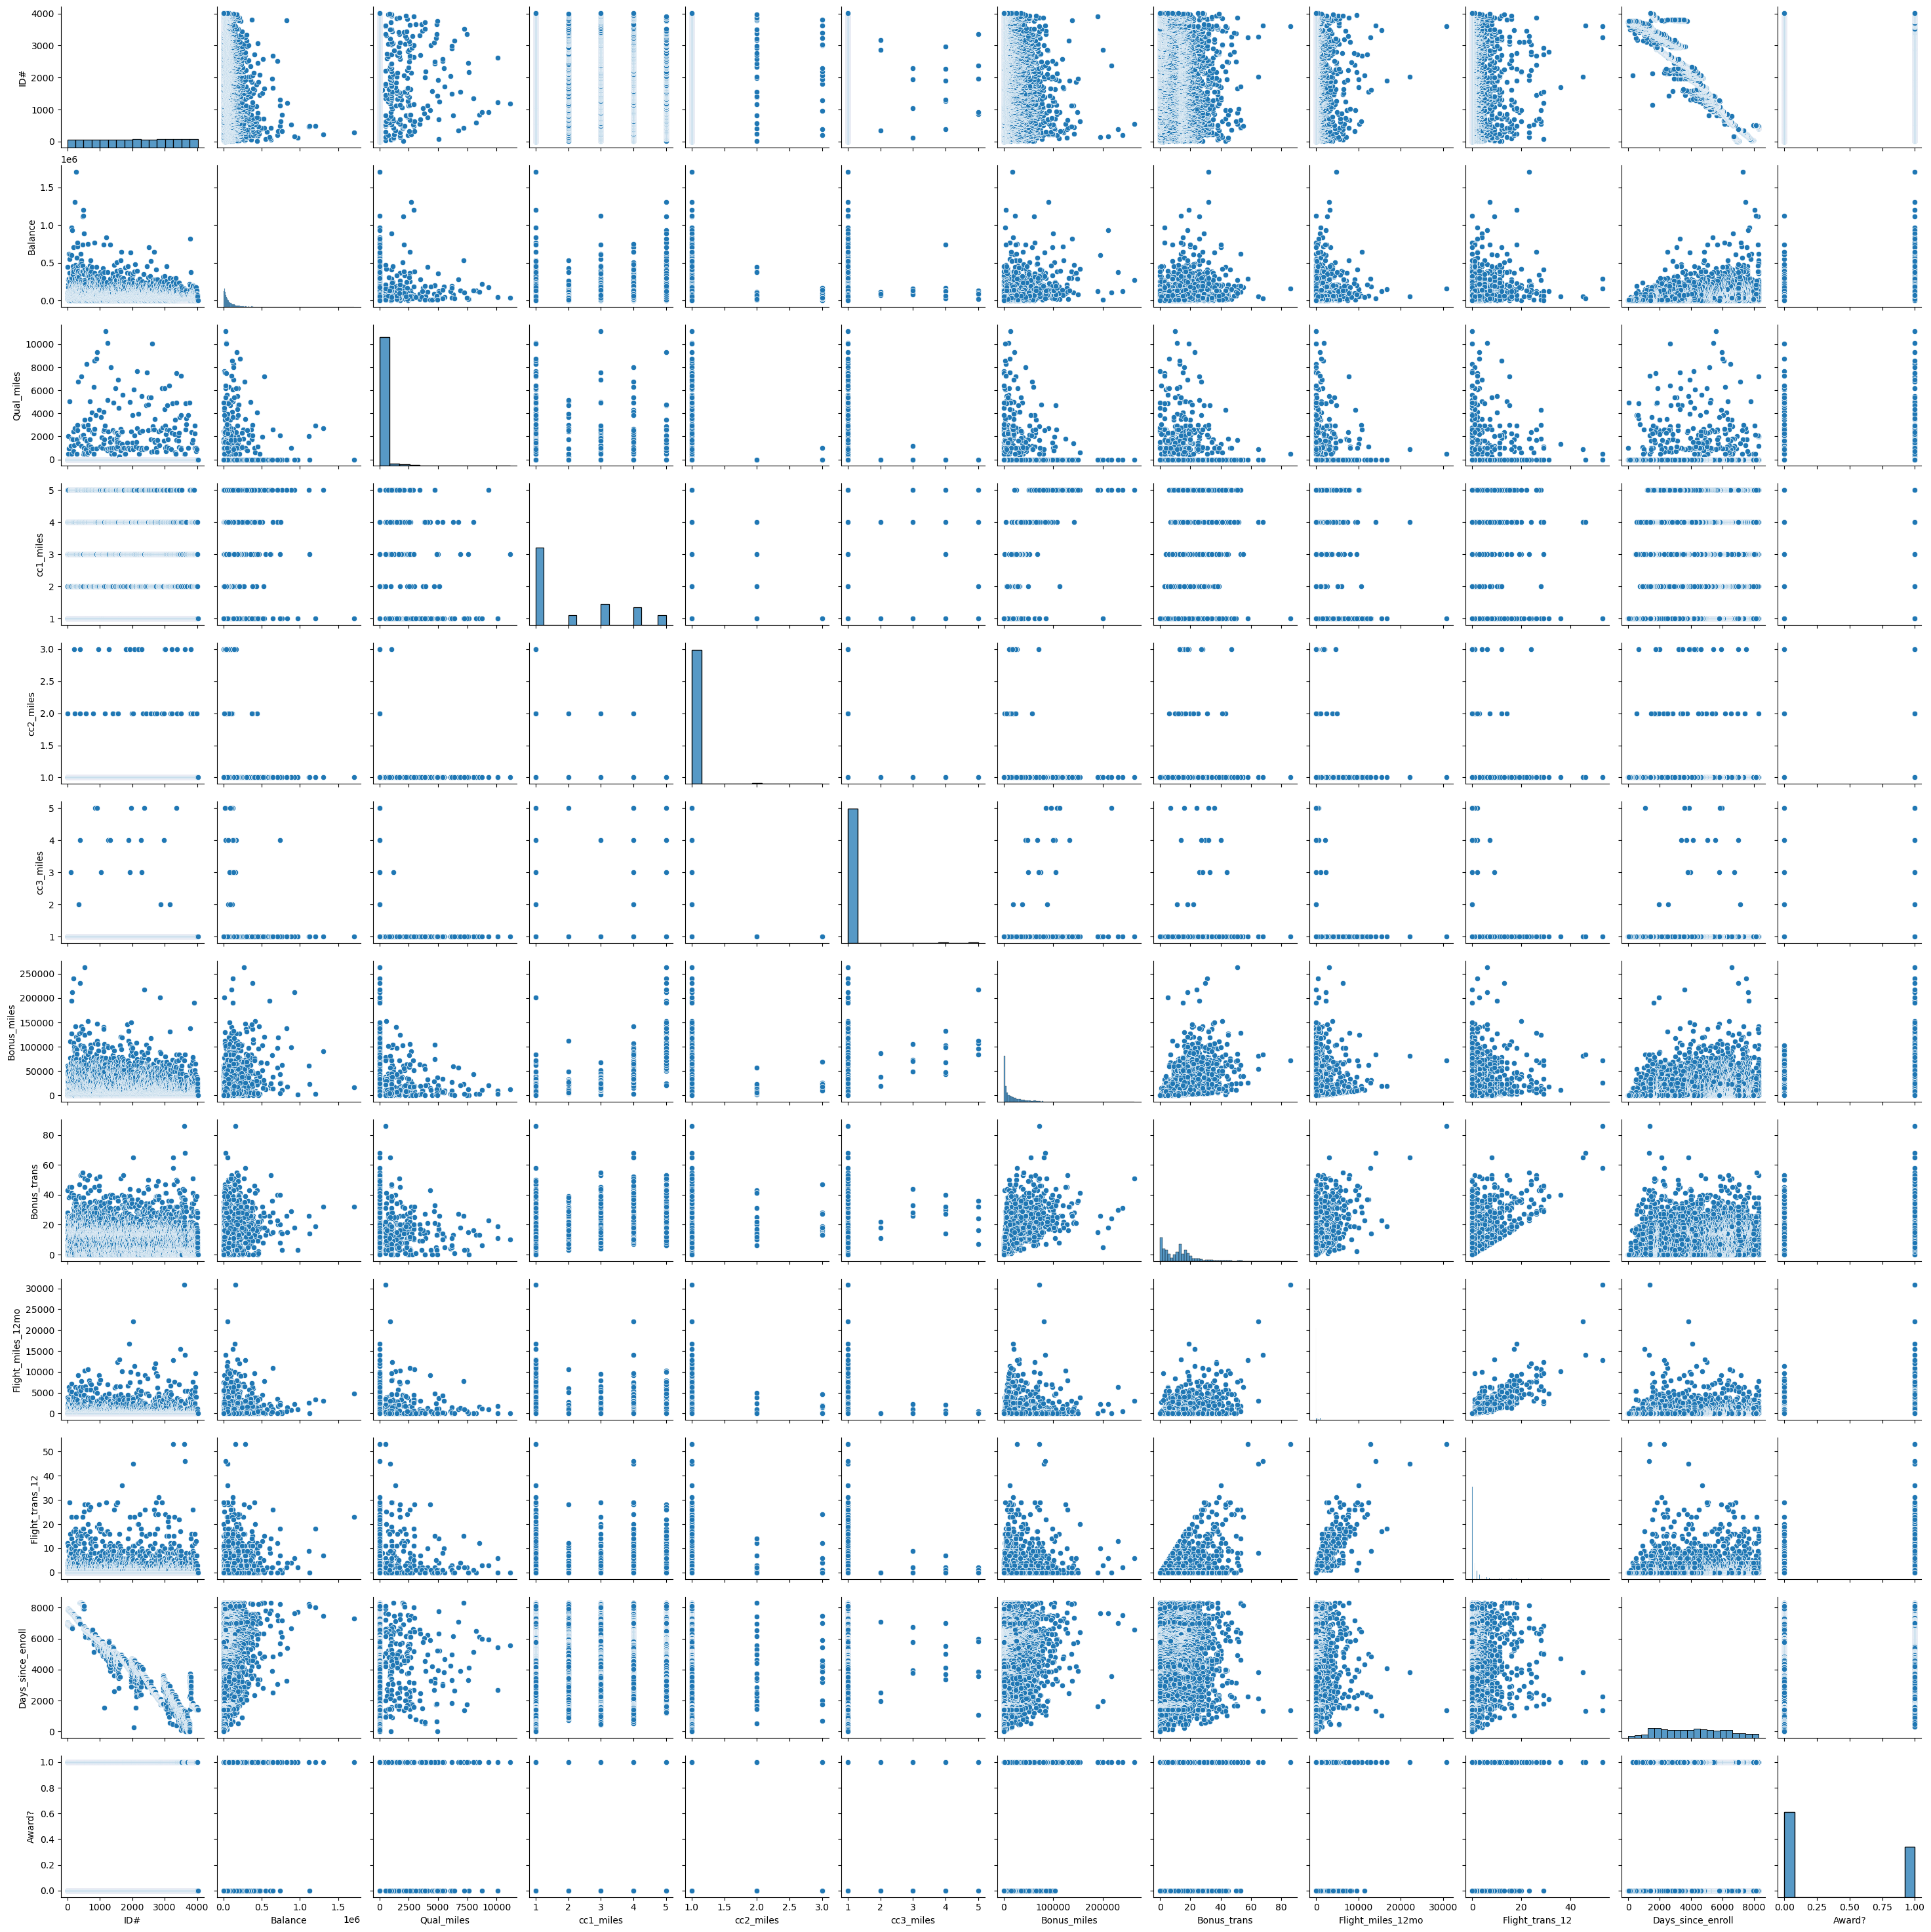

In [427]:
sn.pairplot(ewa_df)
plt.show()

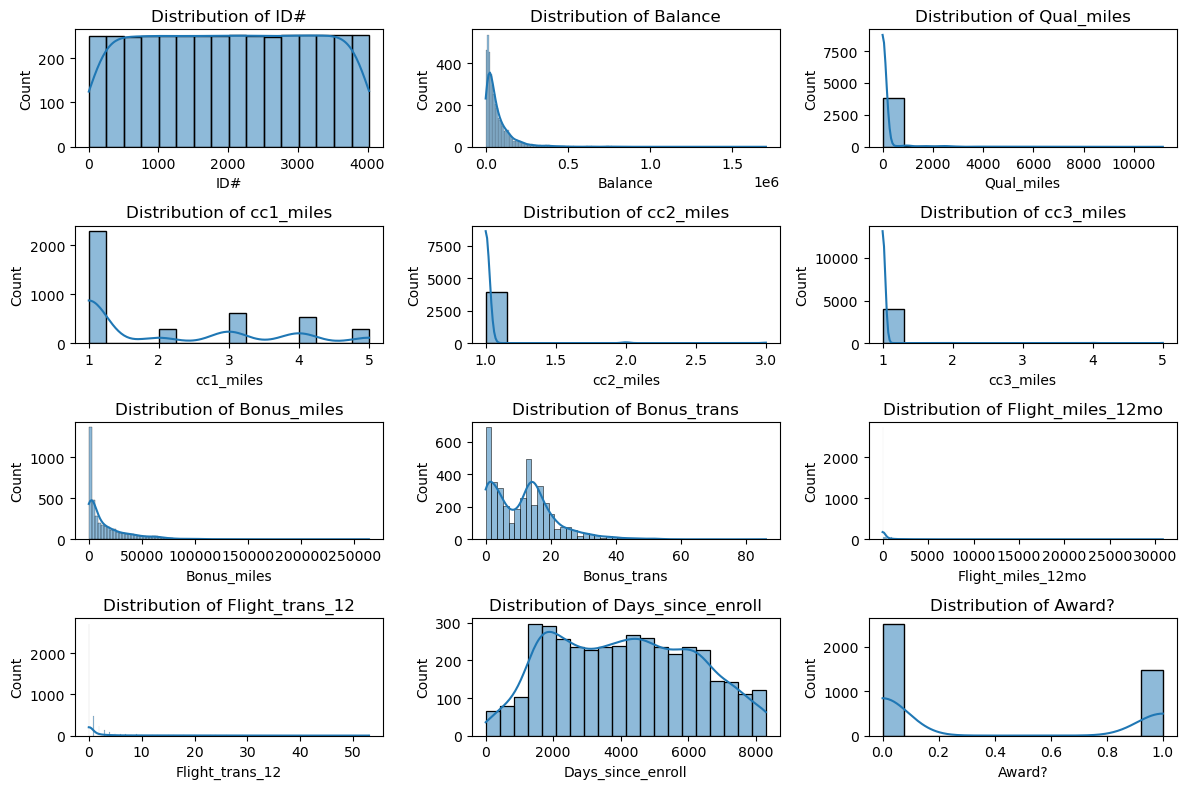

In [428]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(ewa_df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sn.histplot(ewa_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

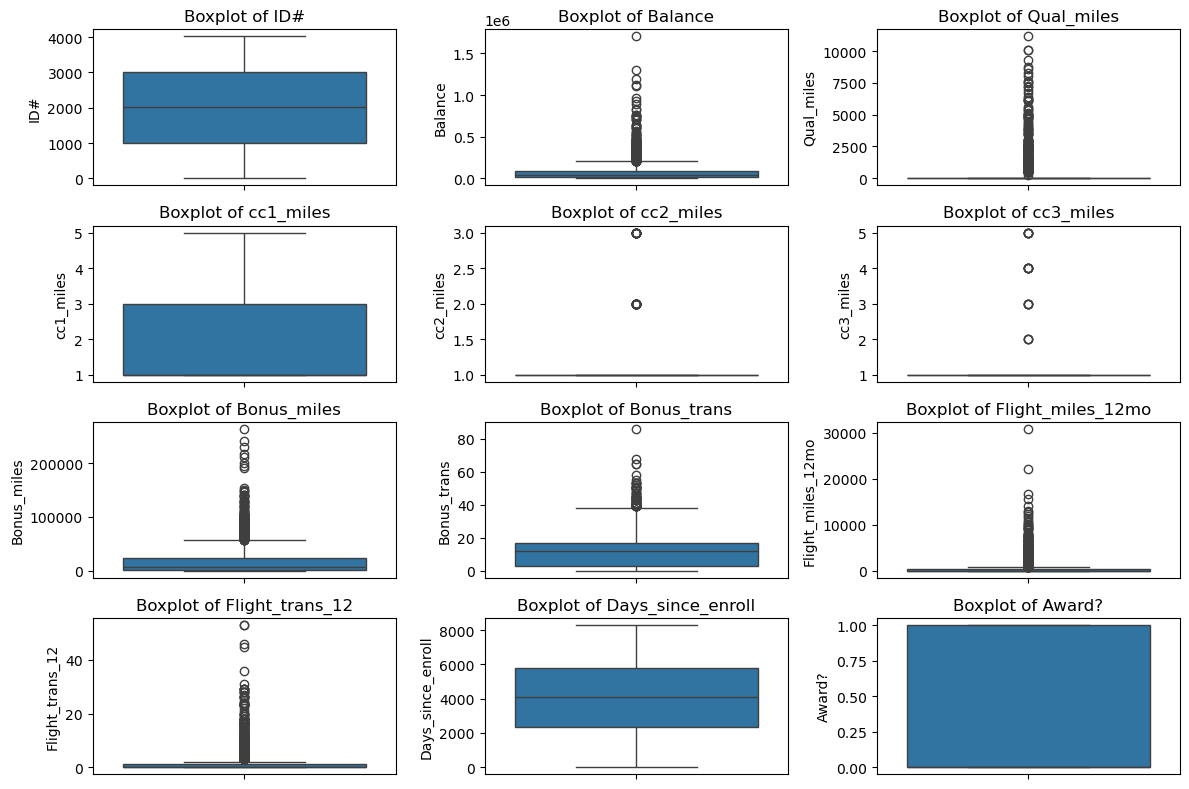

In [429]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(ewa_df.select_dtypes(include=np.number).columns):
    plt.subplot(4, 3, i + 1)
    sn.boxplot(y=ewa_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

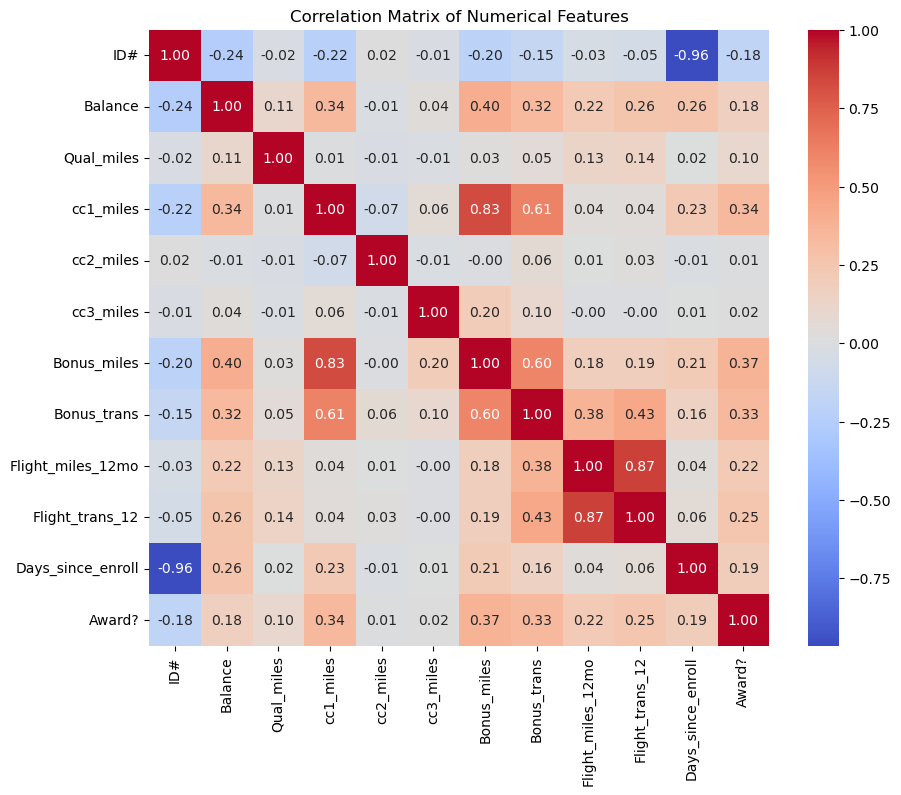

In [430]:
plt.figure(figsize=(10, 8))
correlation_matrix = ewa_df.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Implementing Clustering Algorithms and Visualizations

In [431]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [432]:
df_norm = norm_func(ewa_df.iloc[:,1:])
df_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


### KMeans Clustering

In [506]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [507]:
kmeans = KMeans(n_clusters=5, random_state=0) 
kmeans_labels = kmeans.fit_predict(df_norm)

In [508]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)


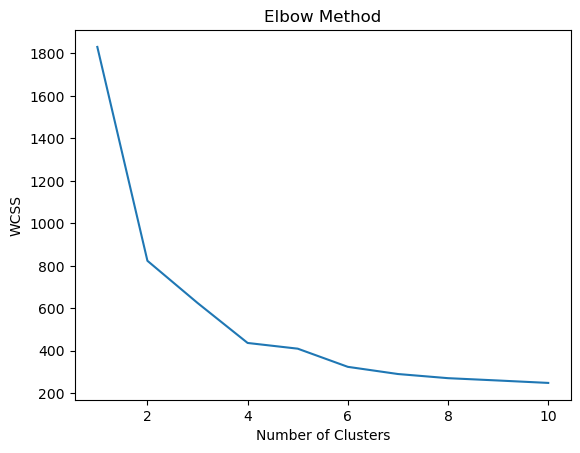

In [509]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score (KMeans): 0.18756191253683654


Text(0.5, 1.0, 'KMeans Clustering')

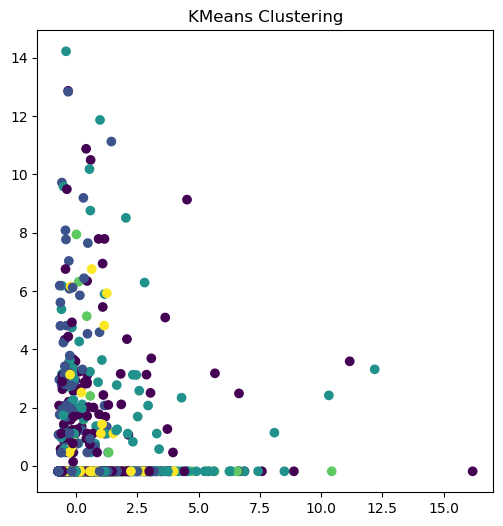

In [540]:
print("Silhouette Score (KMeans):", silhouette_score(df_scaled, kmeans_labels))
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering')

### DBSCAN Clustering

In [511]:
 from sklearn.cluster import DBSCAN

In [512]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_norm)


In [513]:
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples parameters as needed
dbscan_labels = dbscan.fit_predict(df_scaled)


In [514]:
ewa_df['DBSCAN_cluster'] = dbscan_labels  
print(ewa_df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   DBSCAN_cluster  Agglomerative_Labels  
0       

Silhouette Score (DBSCAN): -0.07834757831741161


Text(0.5, 1.0, 'DBSCAN Clustering')

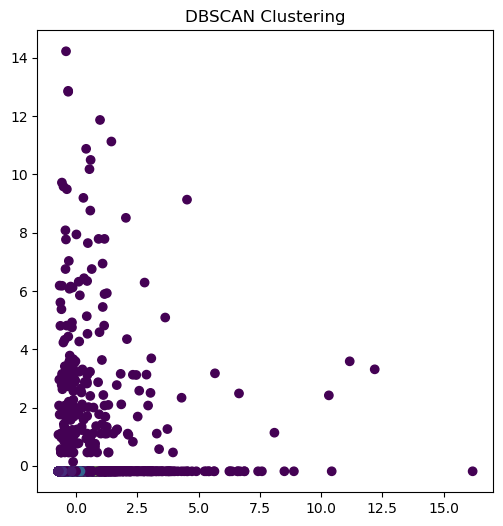

In [534]:
print("Silhouette Score (DBSCAN):", silhouette_score(df_scaled, dbscan_labels))
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 2)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')

### Hierarchical Clustering

In [516]:
from sklearn.cluster import AgglomerativeClustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_norm)

In [517]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward') 
agg_labels = agg_clustering.fit_predict(df_scaled)
ewa_df['Agglomerative_Labels'] = agg_labels
ewa_df.groupby('Agglomerative_Labels').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN_cluster
Agglomerative_Labels,,,,,,,,,,,,,
0,1706.626285,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198,1.568282
1,2197.204007,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383,0.802944
2,1765.615385,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846,-1.000000
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.093023
4,1742.444444,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,-1.000000


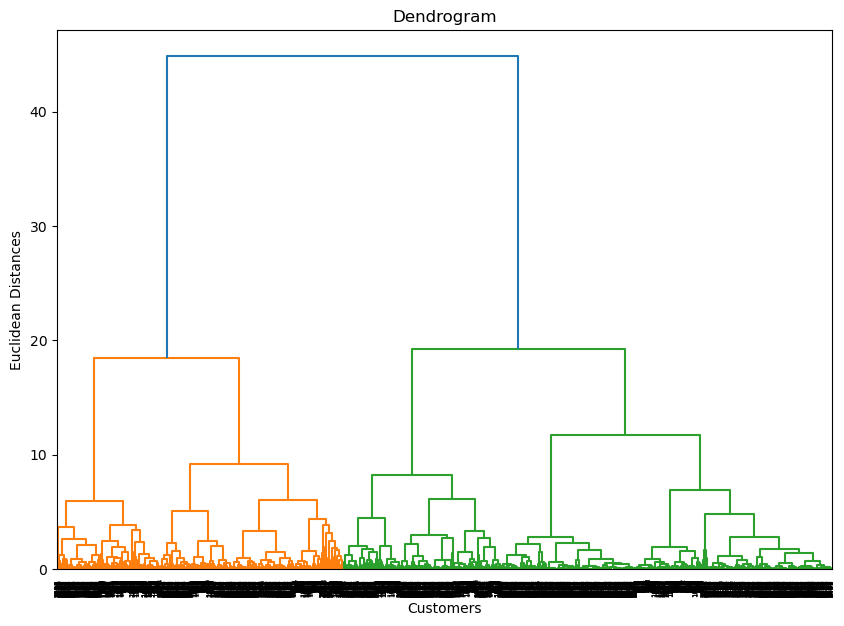

In [518]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward')) 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [519]:
for n_clusters in range(2, 11): 
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward') # Experiment with affinity and linkage
    hierarchical_labels = hierarchical_cluster.fit_predict(df_norm)
    print(f"Silhouette Score (Hierarchical, {n_clusters} clusters): {silhouette_score(df_norm, hierarchical_labels)}")


Silhouette Score (Hierarchical, 2 clusters): 0.535930510919477
Silhouette Score (Hierarchical, 3 clusters): 0.43550164891825044
Silhouette Score (Hierarchical, 4 clusters): 0.42494300944261365
Silhouette Score (Hierarchical, 5 clusters): 0.3762586351398372
Silhouette Score (Hierarchical, 6 clusters): 0.33447794301195294
Silhouette Score (Hierarchical, 7 clusters): 0.32889569025182047
Silhouette Score (Hierarchical, 8 clusters): 0.3125764904816174
Silhouette Score (Hierarchical, 9 clusters): 0.3260265067260809
Silhouette Score (Hierarchical, 10 clusters): 0.3219450851834551


Silhouette Score (Agglomerative): 0.30988053078744143


Text(0.5, 1.0, 'Agglomerative Clustering')

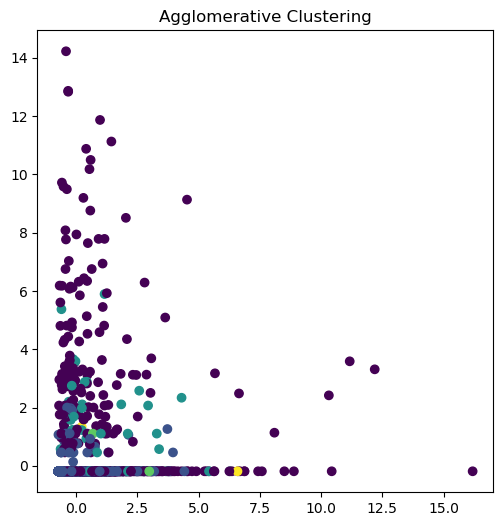

In [536]:
print("Silhouette Score (Agglomerative):", silhouette_score(df_scaled, agg_labels))
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 3)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_labels)
plt.title('Agglomerative Clustering')

In [449]:
kmeans = KMeans(n_clusters=5, random_state=0)  # Based on the Elbow method
kmeans_labels = kmeans.fit_predict(df_norm)

f"Silhouette Score (KMeans): {silhouette_score(df_norm, kmeans_labels)}"


'Silhouette Score (KMeans): 0.4362373571482257'

In [450]:
for eps in [0.2, 0.3, 0.4, 0.5, 0.6]:  # Experiment with different eps values
    for min_samples in [2, 5, 10]:  # Experiment with different min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_scaled)
        
        n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters_dbscan > 1:
            score = silhouette_score(df_scaled, dbscan_labels)
            f"DBSCAN(eps={eps}, min_samples={min_samples}) - Silhouette Score: {score}"
        else:
            print(f"DBSCAN(eps={eps}, min_samples={min_samples}) - Only one cluster found, cannot calculate silhouette score")

 # Analyze and interpret the clusters generated by each clustering algorithm.

## K-means Clustering Analysis :

### The K-means algorithm partitions the data into 5 clusters based on the Elbow method.
### Examine the cluster centers to understand the characteristics of each cluster.
### Analyze the distribution of data points within each cluster and the features that distinguish each cluster.
### Clusters might represent groups of customers with similar flight behavior or spending patterns.


## DBSCAN Clustering Analysis :

### DBSCAN groups data points based on density. The optimal 'eps' and 'min_samples' values are crucial.
### Look at the number of core points, border points, and noise points. 
### Clusters with higher density suggest strong similarity between members.
### Noise points might represent outliers or customers with unique behaviors.
### The silhouette score helps evaluate the quality of the clustering for DBSCAN when there's more than one cluster found.


## Hierarchical Clustering Analysis :

### The dendrogram visually shows the hierarchy of clusters. The height of the lines indicates the distance between clusters.
### Experiment with different linkage methods (ward, complete, average, single) to find the best representation.
### The optimal number of clusters can be determined by observing where the largest vertical distance in the dendrogram occurs before many smaller vertical distances.
### Analyze the features that define the resulting clusters.  
### The silhouette score helps in evaluating the clustering results for different numbers of clusters.

# Evaluation and Performance Metrics:

In [548]:
kmeans_silhouette = silhouette_score(df_norm, kmeans_labels)
print(f"Silhouette Score (KMeans): {kmeans_silhouette}")


Silhouette Score (KMeans): 0.4362373571482257


In [549]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters_dbscan > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")

Silhouette Score (DBSCAN): -0.07834757831741161
